In [53]:
# IMPORT LIBRARIES
import pandas as pd
import numpy as np
pd.options.display.max_columns = None
pd.options.display.max_rows = None
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [70]:
# Import dataset
df = pd.read_csv(r"C:\Users\kkartick\envs\demenv\Scripts\MasterDataScience_FinalProject-master\data\Data_Cleaned_2019_To_Model.csv", sep=',',                 
                 dtype = {"LocationID" : "object"},
                 parse_dates=['datetime'])
df.info()
date1 = df['datetime'].iloc[-1]

# Select columns of interest
df = df[['month', 'hour', 'week', 'dayofweek', 'isholiday', 'LocationID', 'pickups']]
df.info() # check dtypes
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61320 entries, 0 to 61319
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   datetime     61320 non-null  datetime64[ns]
 1   month        61320 non-null  int64         
 2   day          61320 non-null  int64         
 3   hour         61320 non-null  int64         
 4   LocationID   61320 non-null  object        
 5   sales        61320 non-null  int64         
 6   year         61320 non-null  int64         
 7   week         61320 non-null  int64         
 8   dayofweek    61320 non-null  int64         
 9   isweekend    61320 non-null  int64         
 10  isholiday    61320 non-null  int64         
 11  Temperature  61320 non-null  int64         
dtypes: datetime64[ns](1), int64(10), object(1)
memory usage: 5.6+ MB


KeyError: "['pickups'] not in index"

In [ ]:
date1

In [72]:
# Separate variables
X = df[['month','hour','week','dayofweek','isholiday','LocationID']]
y = df['sales']
print("FEATURES 'X' should be a Pandas DataFrame: ", type(X)) # 'X' must be DataFrame and 'y' must be a Pandas Series
display(X.head(2))
print("TARGET VARIABLE 'y' should be a Pandas Series: ",type(y))
display(y.head(2))

FEATURES 'X' should be a Pandas DataFrame:  <class 'pandas.core.frame.DataFrame'>


month  hour  week  dayofweek  isholiday LocationID
0      1     0     1          1          1          4
1      1     0     1          1          1         12

TARGET VARIABLE 'y' should be a Pandas Series:  <class 'pandas.core.series.Series'>


0    49
1     4
Name: sales, dtype: int64

In [73]:
def split_data(X,y):
    valSize = 0.25 #0.8 * 0.2 = 0.2
    testSize = 0.2

    # Split TRAIN-TEST
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

    # Split TRAIN-VALIDATION
#     X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=valSize, random_state=1)
    
    
    print('X_train: {0} ({1}%)'.format(X_train.shape[0], (X_train.shape[0]/X.shape[0])*100))
    print('y_train: {0} ({1}%)'.format(y_train.shape[0], (y_train.shape[0]/X.shape[0])*100))

#     print('X_val: {0} ({1}%)'.format(X_val.shape[0], (X_val.shape[0]/X.shape[0])*100))
#     print('y_val: {0} ({1}%)'.format(y_val.shape[0], (y_val.shape[0]/X.shape[0])*100))

    print('X_test: {0} ({1}%)'.format(X_test.shape[0], (X_test.shape[0]/X.shape[0])*100))
    print('y_test: {0} ({1}%)'.format(y_test.shape[0], (y_test.shape[0]/X.shape[0])*100))
    
    return X_train, X_test, y_train, y_test

In [74]:
X_train, X_test, y_train, y_test = split_data(X,y)

X_train: 49056 (80.0%)
y_train: 49056 (80.0%)
X_test: 12264 (20.0%)
y_test: 12264 (20.0%)


In [75]:
mean  = np.mean(y_test)

In [78]:
MAE/mean

0.13894583891154377

In [9]:
from sklearn.ensemble import GradientBoostingRegressor

regGB = GradientBoostingRegressor(max_depth=10,
                                min_samples_leaf=3,
                                n_estimators=200,
                                learning_rate=0.1)

# Train the model
regGB.fit(X_train,y_train)

GradientBoostingRegressor(max_depth=10, min_samples_leaf=3, n_estimators=200)

In [10]:
regGB_y_pred = regGB.predict(X_val)

### TO CREATE FUTURE DATASET


In [17]:
day =35
gran = "W"

if(gran == "D"):
    end_date = date1 + pd.DateOffset(days=day)
elif (gran == "W"):
    end_date = date1 + pd.DateOffset(weeks=day)
elif (gran =="M"):
    end_date = date1 + pd.DateOffset(months=day)
print(end_date)

2020-09-01 23:00:00


In [18]:
a = pd.period_range(start=date1, end = end_date , freq='H')


In [19]:
a[:5]



PeriodIndex(['2019-12-31 23:00', '2020-01-01 00:00', '2020-01-01 01:00',
             '2020-01-01 02:00', '2020-01-01 03:00'],
            dtype='period[H]')

In [20]:
a[-1]

Period('2020-09-01 23:00', 'H')

In [76]:
import datetime as dt

In [89]:
df_index['datetime'][0].to_timestamp().date()

datetime.date(2019, 12, 31)

In [ ]:
df_index['datetime'].to_timestamp


In [39]:
tdy

datetime.date

In [ ]:
df_index['datetime'].astype('datetime64') 


In [54]:
pd.to_timeseries(df_index['datetime'])

AttributeError: module 'pandas' has no attribute 'to_timeseries'

In [93]:
df_index['datetime'][0].to_timestamp().date()

datetime.date(2019, 12, 31)

In [52]:
df_index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype    
---  ------    --------------  -----    
 0   datetime  30 non-null     period[H]
 1   month     30 non-null     int64    
 2   day       30 non-null     int64    
 3   hour      30 non-null     int64    
dtypes: int64(3), period[H](1)
memory usage: 1.1 KB


In [22]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar


In [23]:
# a = pd.period_range(start=date1, periods = 30 , freq='H')
df_index = pd.DataFrame({'datetime':a})

df_index['month'] = df_index['datetime'].dt.month
df_index['hour'] = df_index['datetime'].dt.hour
df_index['week'] = df_index['datetime'].dt.week
df_index['dayofweek'] = df_index['datetime'].dt.dayofweek

# df_index['datetime'] = df_index['datetime']
df_index['date'] = 0

for i in range(len(df_index)):
    df_index['date'][i] = df_index['datetime'][i].to_timestamp().date()
    
cal = calendar()
last = df_index['date'].iloc[-1]
print("lost",last)
holidays = cal.holidays(start=df_index['date'].iloc[0], end=last)
print("hols:", holidays)
df_index['isholiday'] = df_index['date'].isin(holidays).astype(int)

df_index = df_index.drop(columns=['datetime','date'],inplace=False)

df_index = df_index.iloc[np.arange(len(df_index)).repeat(7)].reset_index(drop=True)

b = pd.DataFrame([4,12,13,24,41,42,43], columns=['LocationID'], dtype=object)
b = pd.concat([b]*len(df_index)).reset_index(drop=True)

df_index['LocationID'] = b['LocationID']
df
# df_index['LocationID'] = df_index['LocationID']

print(df_index.shape)
df_index.head()

c:\users\kkartick\envs\demenv\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


lost 2020-09-01
hols: DatetimeIndex(['2020-01-01', '2020-01-20', '2020-02-17', '2020-05-25',
               '2020-07-03'],
              dtype='datetime64[ns]', freq=None)


c:\users\kkartick\envs\demenv\lib\site-packages\pandas\core\algorithms.py:524: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  return f(comps, values)


(41167, 6)


month  hour  week  dayofweek  isholiday LocationID
0     12    23     1          1          0          4
1     12    23     1          1          0         12
2     12    23     1          1          0         13
3     12    23     1          1          0         24
4     12    23     1          1          0         41

In [24]:
df_index.head(28)

month  hour  week  dayofweek  isholiday LocationID
0      12    23     1          1          0          4
1      12    23     1          1          0         12
2      12    23     1          1          0         13
3      12    23     1          1          0         24
4      12    23     1          1          0         41
5      12    23     1          1          0         42
6      12    23     1          1          0         43
7       1     0     1          2          0          4
8       1     0     1          2          0         12
9       1     0     1          2          0         13
10      1     0     1          2          0         24
11      1     0     1          2          0         41
12      1     0     1          2          0         42
13      1     0     1          2          0         43
14      1     1     1          2          0          4
15      1     1     1          2          0         12
16      1     1     1          2          0         13
17      1     1     1          2          0         24
18      1     1     1          2          0         41
19      1     1     1          2          0         42
20      1     1     1          2          0         43
21      1     2     1          2          0          4
22      1     2     1          2          0         12
23      1     2     1          2          0         13
24      1     2     1          2          0         24
25      1     2     1          2          0         41
26      1     2     1          2          0         42
27      1     2     1          2          0         43

In [135]:
df_index.shape

(210, 6)

In [8]:
b = pd.DataFrame([4,12,13,24,41,42,43], columns=['LocationID'], dtype=object)

b= b.reset_index()

In [12]:
b = pd.concat([b]*8760).reset_index(drop=True)

In [63]:
b['LocationID'] = b['LocationID'].astype(int)

In [65]:
b['LocationID']

0     4
1    12
2    13
3    24
4    41
5    42
6    43
Name: LocationID, dtype: int32

In [64]:
cols = df_index.columns

In [65]:
cols

Index(['month', 'hour', 'week', 'dayofweek', 'isholiday', 'LocationID'], dtype='object')

In [ ]:
cal = calendar()
holidays = cal.holidays(start=df_index.min(), end=df_index.max())
holidays

In [11]:
import pandas as pd
import numpy as np
pd.options.display.max_columns = None
pd.options.display.max_rows = None
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

In [6]:
multivariate = ['month','hour','week','dayofweek','isholiday','LocationID']
target = 'sales'

In [63]:
y_test

NameError: name 'y_test' is not defined

In [64]:

def demand_prediction(df, target, days, duration):

    df= df 
    datetime = df[['datetime']]
    
    print("executed")
    X= df[['month','hour','week','dayofweek','isholiday','LocationID']]
    y = df[[target]]
    
    date = df['datetime'].iloc[-1]
    day = days
    grans = duration
    X_train, X_test, y_train, y_test = split_data(X,y)

    regGB = GradientBoostingRegressor(max_depth=10,
                                min_samples_leaf=3,
                                n_estimators=200,
                                learning_rate=0.1)
    

    # Train the model
    regGB.fit(X_train,y_train)  
    #actual vs preds    

    actual_preds = regGB.predict(X_test)
    MAE, RMSE, R2, R, mape, mapel = get_metrics(y_test, actual_preds)

    print("\n****************************PREDICTION COMPLETED************************")



    #future preds 
    future_df , future_dates = create_futureDF(day, grans, date)
    future_preds = regGB.predict(future_df)
    print("\n*****************Forecast Completed*********************")

    # print("actual/ytest: ", y_test)

    return  actual_preds,y_test, future_preds, datetime , future_dates, MAE, RMSE, R2, R, mape, mapel


def create_futureDF(day, grans, date):    

    if(grans == "D"):
        end_date = date + pd.DateOffset(days=day)
    elif (grans == "W"):
        end_date = date + pd.DateOffset(weeks=day)
    elif (grans =="M"):
        end_date = date + pd.DateOffset(months=day)
    
    

    a = pd.period_range(start=date, end = end_date, freq='H')
    df_index = pd.DataFrame({'datetime':a})

    df_index['month'] = df_index['datetime'].dt.month
    df_index['hour'] = df_index['datetime'].dt.hour
    df_index['week'] = df_index['datetime'].dt.week
    df_index['dayofweek'] = df_index['datetime'].dt.dayofweek

    # df_index['datetime'] = df_index['datetime']
    df_index['date'] = 0

    for i in range(len(df_index)):
        df_index['date'][i] = df_index['datetime'][i].to_timestamp().date()
    
    cal = calendar()
    last = df_index['date'].iloc[-1]
    print("lost",last)
    holidays = cal.holidays(start=df_index['date'].iloc[0], end=last)
    print("hols:", holidays)
    df_index['isholiday'] = df_index['date'].isin(holidays).astype(int)

    df_index = df_index.iloc[np.arange(len(df_index)).repeat(7)].reset_index(drop=True)
    future_dates = df_index['datetime']
    df_index = df_index.drop(columns=['datetime','date'],inplace=False)



    b = pd.DataFrame([4,12,13,24,41,42,43], columns=['LocationID'], dtype=object)
    b = pd.concat([b]*len(df_index)).reset_index(drop=True)

    df_index['LocationID'] = b['LocationID']

    print(df_index.shape)
    print(df_index.head(3))
    df_index.head() 


    return df_index, future_dates




def split_data(X,y):
    
    # Split TRAIN-TEST
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
   
    
    print('X_train: {0} ({1}%)'.format(X_train.shape[0], (X_train.shape[0]/X.shape[0])*100))
    print('y_train: {0} ({1}%)'.format(y_train.shape[0], (y_train.shape[0]/X.shape[0])*100))

    print('X_test: {0} ({1}%)'.format(X_test.shape[0], (X_test.shape[0]/X.shape[0])*100))
    print('y_test: {0} ({1}%)'.format(y_test.shape[0], (y_test.shape[0]/X.shape[0])*100))
    
    return X_train, X_test, y_train,y_test

def get_metrics(y_test, actual_preds):
    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
    
    # MAE: same units as target variable. It is more robust to outliers
    MAE = mean_absolute_error(y_test, actual_preds)

    # RMSE: same units as target variable
    RMSE = np.sqrt(mean_squared_error(y_test, actual_preds))
    
    # R^2
    R2 = r2_score(y_test, actual_preds)
    
    # Correlation
#     R = np.corrcoef(y_test, actual_preds)[0][1]
    R =0
    
    #MAPE
    mape = mean_absolute_percentage_error(y_test, actual_preds)
#     mapel = (np.mean(np.abs((y_test - actual_preds) / y_test))) * 100
    mapel =  (MAE/np.mean(y_test))*100
    print(y_test)
    
    print('MAE: ', MAE)
    print('RMSE: ', RMSE)
    print('R^2 (Coefficient of determination): ', R2)
    print('R (Correlation coefficient): ', R)
    print('MAPE: ', mape)
    print("MAPE2: ",mapel)
    return MAE, RMSE, R2, R, mape, mapel


In [12]:
         

def demand_prediction(df, target, days, duration):

    df= df 
    datetime = df[['datetime']]
    
    print("executed")
    X= df[['month','hour','week','dayofweek','isholiday','LocationID']]
    y = df[[target]]
    
    date = df['datetime'].iloc[-1]
    day = days
    grans = duration
    X_train, X_test, y_train, y_test = split_data(X,y)

    regGB = GradientBoostingRegressor(max_depth=10,
                                min_samples_leaf=3,
                                n_estimators=200,
                                learning_rate=0.1)
    

    # Train the model
    regGB.fit(X_train,y_train)  
    #actual vs preds    
    actual_preds = regGB.predict(X_test)
    

    #future preds 
    future_df , future_dates = create_futureDF(day, grans, date)
    future_preds = regGB.predict(future_df)
    print("\n*****************Forecast Completed*********************")

    # print("actual/ytest: ", y_test)

    return  actual_preds,y_test, future_preds, datetime , future_dates


def create_futureDF(day, grans, date):    

    if(grans == "D"):
        end_date = date + pd.DateOffset(days=day)
    elif (grans == "W"):
        end_date = date + pd.DateOffset(weeks=day)
    elif (grans =="M"):
        end_date = date + pd.DateOffset(months=day)
    
    

    a = pd.period_range(start=date, end = end_date, freq='H')
    df_index = pd.DataFrame({'datetime':a})

    df_index['month'] = df_index['datetime'].dt.month
    df_index['hour'] = df_index['datetime'].dt.hour
    df_index['week'] = df_index['datetime'].dt.week
    df_index['dayofweek'] = df_index['datetime'].dt.dayofweek

    # df_index['datetime'] = df_index['datetime']
    df_index['date'] = 0

    for i in range(len(df_index)):
        df_index['date'][i] = df_index['datetime'][i].to_timestamp().date()
    
    cal = calendar()
    last = df_index['date'].iloc[-1]
    print("lost",last)
    holidays = cal.holidays(start=df_index['date'].iloc[0], end=last)
    print("hols:", holidays)
    df_index['isholiday'] = df_index['date'].isin(holidays).astype(int)
    future_dates = df_index['datetime']
    df_index = df_index.drop(columns=['datetime','date'],inplace=False)

    df_index = df_index.iloc[np.arange(len(df_index)).repeat(7)].reset_index(drop=True)

    b = pd.DataFrame([4,12,13,24,41,42,43], columns=['LocationID'], dtype=object)
    b = pd.concat([b]*len(df_index)).reset_index(drop=True)

    df_index['LocationID'] = b['LocationID']

    print(df_index.shape)
    print(df_index.head(3))
    df_index.head() 


    return df_index, future_dates


In [9]:
days = 20
duration = "D"

In [65]:
 past, actuals, future, past_dates, future_dates,MAE, RMSE, R2, R, mape, mapel = demand_prediction(df, target, days, duration)

executed
X_train: 49056 (80.0%)
y_train: 49056 (80.0%)
X_test: 12264 (20.0%)
y_test: 12264 (20.0%)


c:\users\kkartick\envs\demenv\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


       sales
34542     22
35894     18
53130     10
50144     41
19928    255
39055     89
48142     21
34320     50
6269      80
28737      9
40402     11
13900     15
8153      14
21528      6
49445     84
808       39
61183      3
9403      37
20553      2
18934    334
10705    150
49025     57
26836     25
28677     16
639      129
42779    140
3772     208
32456     14
59340      0
6206      36
35895    290
35549     35
43523      3
38274     16
29741      9
25338     34
6615      25
11546     49
22284     32
28416      2
4203      27
9460      62
24224     17
23104     65
33326    218
31661     11
7291      57
23619     15
57124     44
27105      2
21751    142
50624     17
29628     76
55757     39
33110      5
34290      6
1330      17
19088    312
5510       1
49400      0
37913     12
61109    272
57082     64
29906     47
7534     141
57151      3
58258     82
12599     60
15281      8
46930    161
7106       3
2929      35
29568     13
18204     38
34481     19
21075      7

c:\users\kkartick\envs\demenv\lib\site-packages\ipykernel_launcher.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\users\kkartick\envs\demenv\lib\site-packages\pandas\core\algorithms.py:524: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  return f(comps, values)


(3367, 6)
   month  hour  week  dayofweek  isholiday LocationID
0     12    23     1          1          0          4
1     12    23     1          1          0         12
2     12    23     1          1          0         13

*****************Forecast Completed*********************


In [30]:
past_dates.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61320 entries, 0 to 61319
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  61320 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 479.2 KB


In [33]:
future_dates[:5]

0    2019-12-31 23:00
1    2020-01-01 00:00
2    2020-01-01 01:00
3    2020-01-01 02:00
4    2020-01-01 03:00
Name: datetime, dtype: period[H]

In [38]:
    abc  = actuals
    past = list(past)
    actuals = list(abc)
    past = list(future)  
    past_dates = list(past_dates)
    
    future_dates = list(future_dates)
    
    

In [52]:
list(future)

[26.63549876260555,
 0.9216041009084704,
 26.42263983339318,
 37.35651650681757,
 58.30531786389623,
 38.655060060300244,
 77.06900052156051,
 8.472296870817013,
 -1.0571875169382505,
 14.057907813994138,
 1.6687069746042837,
 21.01772466218016,
 7.284553857402884,
 16.003982378369194,
 6.959085136393153,
 -3.0335897794303106,
 7.934835580164837,
 -1.9034806552309573,
 11.982553022194283,
 0.29488998997934895,
 19.923903665506398,
 -1.6536715418282601,
 -0.15027341549956214,
 1.6146423942104184,
 2.593439836748574,
 4.784792788680808,
 2.9399989192468454,
 -2.5342602140393007,
 4.410078157324511,
 -0.33727608861702685,
 0.47089686915703133,
 2.581839540359539,
 5.825680274416506,
 5.322261826148943,
 -6.437603858742419,
 1.407185640572586,
 0.26927223755871166,
 3.931885978953339,
 4.900993787087477,
 7.8390574869470315,
 6.262527197369491,
 2.2852128951241872,
 -1.1042630286656265,
 1.1054679142142696,
 12.769333040249657,
 7.804395883947058,
 12.538221527520758,
 7.028015355786997,
 

In [39]:
past_dates[:5]

[Timestamp('2019-01-01 00:00:00'),
 Timestamp('2019-01-01 00:00:00'),
 Timestamp('2019-01-01 00:00:00'),
 Timestamp('2019-01-01 00:00:00'),
 Timestamp('2019-01-01 00:00:00')]

In [49]:
[str(i) for i in future_dates]

['2019-12-31 23:00',
 '2020-01-01 00:00',
 '2020-01-01 01:00',
 '2020-01-01 02:00',
 '2020-01-01 03:00',
 '2020-01-01 04:00',
 '2020-01-01 05:00',
 '2020-01-01 06:00',
 '2020-01-01 07:00',
 '2020-01-01 08:00',
 '2020-01-01 09:00',
 '2020-01-01 10:00',
 '2020-01-01 11:00',
 '2020-01-01 12:00',
 '2020-01-01 13:00',
 '2020-01-01 14:00',
 '2020-01-01 15:00',
 '2020-01-01 16:00',
 '2020-01-01 17:00',
 '2020-01-01 18:00',
 '2020-01-01 19:00',
 '2020-01-01 20:00',
 '2020-01-01 21:00',
 '2020-01-01 22:00',
 '2020-01-01 23:00',
 '2020-01-02 00:00',
 '2020-01-02 01:00',
 '2020-01-02 02:00',
 '2020-01-02 03:00',
 '2020-01-02 04:00',
 '2020-01-02 05:00',
 '2020-01-02 06:00',
 '2020-01-02 07:00',
 '2020-01-02 08:00',
 '2020-01-02 09:00',
 '2020-01-02 10:00',
 '2020-01-02 11:00',
 '2020-01-02 12:00',
 '2020-01-02 13:00',
 '2020-01-02 14:00',
 '2020-01-02 15:00',
 '2020-01-02 16:00',
 '2020-01-02 17:00',
 '2020-01-02 18:00',
 '2020-01-02 19:00',
 '2020-01-02 20:00',
 '2020-01-02 21:00',
 '2020-01-02 

In [50]:
[str(i) for i in past_dates]

['2019-01-01 00:00:00',
 '2019-01-01 00:00:00',
 '2019-01-01 00:00:00',
 '2019-01-01 00:00:00',
 '2019-01-01 00:00:00',
 '2019-01-01 00:00:00',
 '2019-01-01 00:00:00',
 '2019-01-01 01:00:00',
 '2019-01-01 01:00:00',
 '2019-01-01 01:00:00',
 '2019-01-01 01:00:00',
 '2019-01-01 01:00:00',
 '2019-01-01 01:00:00',
 '2019-01-01 01:00:00',
 '2019-01-01 02:00:00',
 '2019-01-01 02:00:00',
 '2019-01-01 02:00:00',
 '2019-01-01 02:00:00',
 '2019-01-01 02:00:00',
 '2019-01-01 02:00:00',
 '2019-01-01 02:00:00',
 '2019-01-01 03:00:00',
 '2019-01-01 03:00:00',
 '2019-01-01 03:00:00',
 '2019-01-01 03:00:00',
 '2019-01-01 03:00:00',
 '2019-01-01 03:00:00',
 '2019-01-01 03:00:00',
 '2019-01-01 04:00:00',
 '2019-01-01 04:00:00',
 '2019-01-01 04:00:00',
 '2019-01-01 04:00:00',
 '2019-01-01 04:00:00',
 '2019-01-01 04:00:00',
 '2019-01-01 04:00:00',
 '2019-01-01 05:00:00',
 '2019-01-01 05:00:00',
 '2019-01-01 05:00:00',
 '2019-01-01 05:00:00',
 '2019-01-01 05:00:00',
 '2019-01-01 05:00:00',
 '2019-01-01 05:

In [29]:
y_test.reset

34542     22.0
35894     18.0
53130     10.0
50144     41.0
19928    255.0
39055     89.0
48142     21.0
34320     50.0
6269      80.0
28737      9.0
40402     11.0
13900     15.0
8153      14.0
21528      6.0
49445     84.0
808       39.0
61183      3.0
9403      37.0
20553      2.0
18934    334.0
10705    150.0
49025     57.0
26836     25.0
28677     16.0
639      129.0
42779    140.0
3772     208.0
32456     14.0
59340      0.0
6206      36.0
35895    290.0
35549     35.0
43523      3.0
38274     16.0
29741      9.0
25338     34.0
6615      25.0
11546     49.0
22284     32.0
28416      2.0
4203      27.0
9460      62.0
24224     17.0
23104     65.0
33326    218.0
31661     11.0
7291      57.0
23619     15.0
57124     44.0
27105      2.0
21751    142.0
50624     17.0
29628     76.0
55757     39.0
33110      5.0
34290      6.0
1330      17.0
19088    312.0
5510       1.0
49400      0.0
37913     12.0
61109    272.0
57082     64.0
29906     47.0
7534     141.0
57151      3.0
58258     

In [36]:
type(future)

list

In [40]:
type(y_test)
# y_test



pandas.core.series.Series

In [53]:
a = pd.DataFrame({'preds' : future,'act': y_test})


In [54]:
a

preds    act
34542   33.079847   22.0
35894   19.205146   18.0
53130    5.360851   10.0
50144   44.930525   41.0
19928  295.314803  255.0
39055  106.552738   89.0
48142   26.359458   21.0
34320   55.308444   50.0
6269    89.172538   80.0
28737   18.834352    9.0
40402   10.590679   11.0
13900   16.991110   15.0
8153    15.633989   14.0
21528    3.043679    6.0
49445   74.686277   84.0
808     39.139691   39.0
61183    1.315921    3.0
9403    50.662913   37.0
20553    2.971177    2.0
18934  315.550491  334.0
10705  149.178697  150.0
49025   50.774276   57.0
26836   14.686983   25.0
28677   14.868188   16.0
639    136.120297  129.0
42779  133.739608  140.0
3772   232.691039  208.0
32456   12.407160   14.0
59340    0.588888    0.0
6206    37.322421   36.0
35895  284.534265  290.0
35549   30.459762   35.0
43523    9.650183    3.0
38274   17.723929   16.0
29741   12.479904    9.0
25338   30.664692   34.0
6615    21.131988   25.0
11546   52.579554   49.0
22284   32.052088   32.0
28416    2.350802    2.0
4203    22.240647   27.0
9460    68.613255   62.0
24224   12.795598   17.0
23104   64.257462   65.0
33326  175.893526  218.0
31661    7.609648   11.0
7291    47.817382   57.0
23619   10.839521   15.0
57124   36.194544   44.0
27105    1.759535    2.0
21751  126.629984  142.0
50624   22.626729   17.0
29628   56.963913   76.0
55757   62.591798   39.0
33110    3.967459    5.0
34290    6.877256    6.0
1330    17.254223   17.0
19088  335.066413  312.0
5510     1.520390    1.0
49400   -0.218783    0.0
37913    8.875909   12.0
61109  316.159154  272.0
57082   67.094647   64.0
29906   43.656717   47.0
7534   143.043488  141.0
57151    5.199463    3.0
58258   80.754359   82.0
12599   86.372942   60.0
15281    9.037371    8.0
46930  139.677782  161.0
7106    -0.181752    3.0
2929    32.593244   35.0
29568   11.205578   13.0
18204   64.899032   38.0
34481   18.048876   19.0
21075   10.328003    7.0
36401   14.880394   13.0
40564  159.753571  167.0
55193   14.457886   13.0
54298    5.024701    5.0
34217   11.294893    7.0
40823   47.412064   39.0
1676    19.075361   13.0
51135   19.949234   14.0
21960   16.724425   16.0
50046   28.488267   37.0
12112    6.735928   11.0
31882   37.570455   45.0
17377   53.548190   52.0
46243    1.140102    0.0
557     66.909710   73.0
12214  276.962602  323.0
16979   13.904917   12.0
29924    6.095042    5.0
51420   20.377760   27.0
28232   -0.290624    0.0
2684    12.900310   11.0
33864   28.471126   32.0
40730   43.131377   30.0
51301   20.809204   26.0
57417   36.053315   38.0
53935    3.558391    8.0
10801   19.613364   22.0
6559   103.970202  106.0
3675    17.148301   15.0
4773   216.517106  229.0
43752  112.853771  127.0
44909   71.496710   76.0
52958    9.380081   13.0
51961   17.233099   16.0
619     34.142362   41.0
50208   38.494741   31.0
36211   11.223904    9.0
60383    5.121751    3.0
4943     1.056833    3.0
57413  266.515663  251.0
12992   25.803582   31.0
9123     8.611140   20.0
11487   15.102405   12.0
6970    10.171447    4.0
35769  142.702216  153.0
20561  158.188816  178.0
8490   198.993521  221.0
50971   44.662984   39.0
41943  286.332467  258.0
57607   30.217188   28.0
48058    4.369677    2.0
56468    2.850679    3.0
22962  111.457081  128.0
40988    9.023588   11.0
17492    4.011258    1.0
25593    0.706327    2.0
60382    9.951019   11.0
35180   21.061534   14.0
17016   58.408695   53.0
10158    2.437929    4.0
22531    2.930866    3.0
48224   -0.643645    0.0
29804   21.521083   17.0
34100    9.729541   17.0
15709    7.668149    4.0
43324    4.543112    4.0
9835    14.385902   10.0
51918   21.838784   15.0
29180   46.369910   34.0
6327   322.505717  353.0
50131   48.965447   50.0
31709  260.360564  232.0
46253   79.998684   89.0
60986    6.046949    4.0
32288    7.417583    6.0
32155   36.629011   39.0
44697    9.745616   14.0
12548   58.230236   65.0
53955    0.595673    0.0
11086   14.418432    9.0
41679   -0.031238    0.0
38261  247.123358  255.0
53274    6.960667    7.0
19152   15.3

In [50]:
a = a.drop('index', axis=1)

<AxesSubplot:>

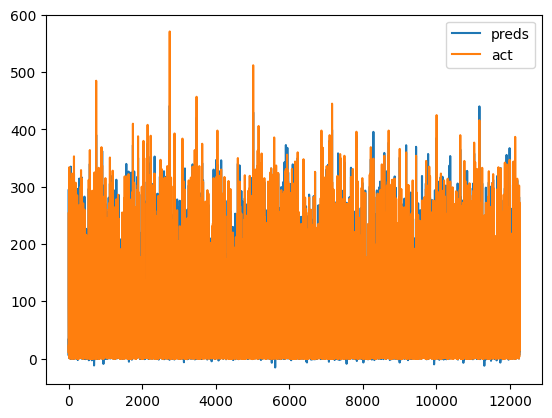

In [52]:
a.plot()

In [34]:
a

index          0          1          2          3           4           5  \
0      0  33.079847  19.205146   5.360851  44.930525  295.314803  106.552738   
1      1  22.000000  18.000000  10.000000  41.000000  255.000000   89.000000   

           6          7          8          9         10        11         12  \
0  26.359458  55.308444  89.172538  18.834352  10.590679  16.99111  15.633989   
1  21.000000  50.000000  80.000000   9.000000  11.000000  15.00000  14.000000   

         13         14         15        16         17        18          19  \
0  3.043679  74.686277  39.139691  1.315921  50.662913  2.971177  315.550491   
1  6.000000  84.000000  39.000000  3.000000  37.000000  2.000000  334.000000   

           20         21         22         23          24          25  \
0  149.178697  50.774276  14.686983  14.868188  136.120297  133.739608   
1  150.000000  57.000000  25.000000  16.000000  129.000000  140.000000   

           26        27        28         29          30         31        32  \
0  232.691039  12.40716  0.588888  37.322421  284.534265  30.459762  9.650183   
1  208.000000  14.00000  0.000000  36.000000  290.000000  35.000000  3.000000   

          33         34         35         36         37         38        39  \
0  17.723929  12.479904  30.664692  21.131988  52.579554  32.052088  2.350802   
1  16.000000   9.000000  34.000000  25.000000  49.000000  32.000000  2.000000   

          40         41         42         43          44         45  \
0  22.240647  68.613255  12.795598  64.257462  175.893526   7.609648   
1  27.000000  62.000000  17.000000  65.000000  218.000000  11.000000   

          46         47         48        49          50         51  \
0  47.817382  10.839521  36.194544  1.759535  126.629984  22.626729   
1  57.000000  15.000000  44.000000  2.000000  142.000000  17.000000   

          52         53        54        55         56          57       58  \
0  56.963913  62.591798  3.967459  6.877256  17.254223  335.066413  1.52039   
1  76.000000  39.000000  5.000000  6.000000  17.000000  312.000000  1.00000   

         59         60          61         62         63          64  \
0 -0.218783   8.875909  316.159154  67.094647  43.656717  143.043488   
1  0.000000  12.000000  272.000000  64.000000  47.000000  141.000000   

         65         66         67        68          69        70         71  \
0  5.199463  80.754359  86.372942  9.037371  139.677782 -0.181752  32.593244   
1  3.000000  82.000000  60.000000  8.000000  161.000000  3.000000  35.000000   

          72         73         74         75         76          77  \
0  11.205578  64.899032  18.048876  10.328003  14.880394  159.753571   
1  13.000000  38.000000  19.000000   7.000000  13.000000  167.000000   

          78        79         80         81         82         83         84  \
0  14.457886  5.024701  11.294893  47.412064  19.075361  19.949234  16.724425   
1  13.000000  5.000000   7.000000  39.000000  13.000000  14.000000  16.000000   

          85         86         87        88        89        90          91  \
0  28.488267   6.735928  37.570455  53.54819  1.140102  66.90971  276.962602   
1  37.000000  11.000000  45.000000  52.00000  0.000000  73.00000  323.000000   

          92        93        94        95        96         97         98  \
0  13.904917  6.095042  20.37776 -0.290624  12.90031  28.471126  43.131377   
1  12.000000  5.000000  27.00000  0.000000  11.00000  32.000000  30.000000   

          99        100       101        102         103        104  \
0  20.809204  36.053315  3.558391  19.613364  103.970202  17.148301   
1  26.000000  38.000000  8.000000  22.000000  106.000000  15.000000   

          105         106       107        108        109        110  \
0  216.517106  112.853771  71.49671   9.380081  17.233099  34.142362   
1  229.000000  127.000000  76.00000  13.000000  16.000000  41.000000   

         111        112       113       114         115        116     

In [ ]:

forecastname = ''#data['forecastname']
descript = #data['description']
target = #data['target']
days = #data['days']
duration = #data['duration']
#print(data)

df = pd.read_csv(r'.\datasets\dataset.csv', parse_dates=['datetime'])
print("DF:", df.head(3))
print("Info:",df.info())

past, actuals, future, past_dates, future_dates = demand_prediction(df, target, days, duration)

print(type(past_dates),type(future_dates))
print(past_dates.info())
print("ytest: ", actuals.head(3))

past = list(past)
actuals = list(actuals['pickups'])
past = list(future)  
past_dates = list(past_dates)
future_dates = list(future_dates)

flength  = len(future)
plength = len(actuals)
if flength> plength:
    past_sum = sum(actuals)
else:
    diff  =  abs(plength - flength)
    past_sum = sum(actuals[diff:])
    print("length: " , diff)


print("actuals: ",actuals[:5])
# past_sum = sum(actuals)
print("past: ",past_sum)
future_sum = round(sum(future), 2)
                    
print(future_sum)
# difference  = 0
difference = round((future_sum - past_sum)/ (past_sum*100), 3)

print("difference", difference)      

print("Past datatype:", type(past_dates))

retdata = {"name": forecastname, "description":descript, "target":target, "days":days,"duration":duration,
            "pastdata": past, "futuredata":future, "pastdates": past_dates,"futuredates":future_dates}